Importing Necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Importing CSV file into @GL-colab

In [ ]:
df_train_set = pd.read_csv('/content/train.csv')
df_test_set = pd.read_csv('/content/test.csv')

In [ ]:
df_train_set.head(5)

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0
2,2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
3,3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
4,4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,19.8


In [ ]:
df_test_set.head(5)

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.10612,30.0,4.93,0,0.428,6.095,65.1,6.3361,6,300.0,16.6,394.62,12.40
1,1,0.34109,0.0,7.38,0,0.493,6.415,40.1,4.7211,5,287.0,19.6,396.90,6.12
2,2,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666.0,20.2,24.65,15.69
3,3,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45
4,4,1.80028,0.0,19.58,0,0.605,5.877,79.2,2.4259,5,403.0,14.7,227.61,12.14


____________________________________________________________________________________________
# **Data Cleaning** - Train Data set

> 1. Train dataset ---> df_train_set

In [ ]:
df_train_set.info()

# Displays the index & column details of "Train_set"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       400 non-null    int64  
 1   CRIM     400 non-null    float64
 2   ZN       400 non-null    float64
 3   INDUS    400 non-null    float64
 4   CHAS     400 non-null    int64  
 5   NOX      400 non-null    float64
 6   RM       400 non-null    float64
 7   AGE      400 non-null    float64
 8   DIS      400 non-null    float64
 9   RAD      400 non-null    int64  
 10  TAX      400 non-null    float64
 11  PTRATIO  400 non-null    float64
 12  B        400 non-null    float64
 13  LSTAT    400 non-null    float64
 14  MEDV     400 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 47.0 KB


In [ ]:
df_train_set.isnull().sum()

ID         0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
df_train_set.dtypes

ID           int64
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [ ]:
len(df_train_set.ID.unique())

400

In [ ]:
df_train_set.drop(['ID'], axis = 1, inplace = True)
df_train_set = df_train_set.drop_duplicates()

In [ ]:
df_train_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,3.757191,10.970000,10.936425,0.072500,0.552817,6.292165,68.086000,3.819462,9.462500,403.797500,18.459000,359.455375,12.668525,22.475750
std,9.155496,22.796261,6.848042,0.259639,0.115488,0.709923,28.386888,2.132445,8.687478,169.656816,2.148105,86.732906,7.207047,9.218611
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.920000,5.000000
25%,0.077820,0.000000,5.130000,0.000000,0.449000,5.877500,42.375000,2.109150,4.000000,277.000000,17.400000,376.115000,6.990000,17.100000
50%,0.242170,0.000000,8.560000,0.000000,0.532000,6.208500,76.950000,3.272100,5.000000,329.000000,18.950000,391.575000,10.875000,21.000000
75%,3.543427,12.500000,18.100000,0.000000,0.624000,6.620500,93.825000,5.214600,24.000000,666.000000,20.200000,396.285000,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#-------------------------------------------------------------------------------------------
### **CRIM** - Column of Train_set

In [ ]:
q2 = df_train_set.CRIM.quantile(0.75)
q1 = df_train_set.CRIM.quantile(0.25)
iqr = q2 - q1
upper = q2 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

# finding (lower limit , upper limit) of CRIM column --from--> df_train_set

(-5.1205912499999995, 8.74183875)

In [ ]:
df_train_set.CRIM = df_train_set.CRIM.clip(-5.12, 8.74)

# storing lower & upper limit of CRIM value inside "df_train_set.CRIM"

#-------------------------------------------------------------------------------------------
### **ZN** - Column of Train_set

In [ ]:
q2 = df_train_set.ZN.quantile(0.75)
q1 = df_train_set.ZN.quantile(0.25)
iqr = q2 - q1
upper = q2 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

# finding (lower limit , upper limit) of ZN column --from--> df_train_set

(-18.75, 31.25)

In [ ]:
df_train_set.ZN = df_train_set.ZN.clip(-18.75, 31.25)

# storing lower & upper limit of ZN value inside "df_train_set.ZN"

#-------------------------------------------------------------------------------------------
### **INDUS** - Column of Train_set

In [ ]:
q2 = df_train_set.INDUS.quantile(0.75)
q1 = df_train_set.INDUS.quantile(0.25)
iqr = q2 - q1
upper = q2 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

# finding (lower limit , upper limit) of INDUS column --from--> df_train_set

(-14.325000000000006, 37.55500000000001)

In [ ]:
df_train_set.INDUS = df_train_set.INDUS.clip(-14.32, 37.55)

# storing lower & upper limit of INDUS value inside "df_train_set.INDUS"

#-------------------------------------------------------------------------------------------
### **LSTAT** - Column of Train_set

In [ ]:
q2 = df_train_set.LSTAT.quantile(0.75)
q1 = df_train_set.LSTAT.quantile(0.25)
iqr = q2 - q1
upper = q2 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

# finding (lower limit , upper limit) of LSTAT column --from--> df_train_set

(-7.889999999999999, 31.79)

In [ ]:
df_train_set.LSTAT = df_train_set.LSTAT.clip(-7.89, 31.79)

# storing lower & upper limit of LSTAT value inside "df_train_set.LSTAT"

#-------------------------------------------------------------------------------------------
### **MEDV** - Column of Train_set

In [ ]:
q2 = df_train_set.MEDV.quantile(0.75)
q1 = df_train_set.MEDV.quantile(0.25)
iqr = q2 - q1
upper = q2 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

# finding (lower limit , upper limit) of MEDV column --from--> df_train_set

(5.2500000000000036, 36.849999999999994)

In [ ]:
df_train_set.MEDV = df_train_set.MEDV.clip(5.25, 36.85)

# storing lower & upper limit of MEDV value inside "df_train_set.MEDV"

In [ ]:
df_train_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000
mean,2.169648,6.820000,10.936425,0.072500,0.552817,6.292165,68.086000,3.819462,9.462500,403.797500,18.459000,359.455375,12.62655,21.796000
std,3.224392,11.918719,6.848042,0.259639,0.115488,0.709923,28.386888,2.132445,8.687478,169.656816,2.148105,86.732906,7.08280,7.560084
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.92000,5.250000
25%,0.077820,0.000000,5.130000,0.000000,0.449000,5.877500,42.375000,2.109150,4.000000,277.000000,17.400000,376.115000,6.99000,17.100000
50%,0.242170,0.000000,8.560000,0.000000,0.532000,6.208500,76.950000,3.272100,5.000000,329.000000,18.950000,391.575000,10.87500,21.000000
75%,3.543427,12.500000,18.100000,0.000000,0.624000,6.620500,93.825000,5.214600,24.000000,666.000000,20.200000,396.285000,16.91000,25.000000
max,8.740000,31.250000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,31.79000,36.850000


___________________________________________________________________________________

# **Data Cleaning - Test data set**

> 2. Test dataset --@--> df_test_set

In [ ]:
df_test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       105 non-null    int64  
 1   CRIM     105 non-null    float64
 2   ZN       105 non-null    float64
 3   INDUS    105 non-null    float64
 4   CHAS     105 non-null    int64  
 5   NOX      105 non-null    float64
 6   RM       105 non-null    float64
 7   AGE      105 non-null    float64
 8   DIS      105 non-null    float64
 9   RAD      105 non-null    int64  
 10  TAX      105 non-null    float64
 11  PTRATIO  105 non-null    float64
 12  B        105 non-null    float64
 13  LSTAT    105 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 11.6 KB


In [ ]:
df_test_set.isnull().sum()

ID         0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [ ]:
df_test_set.dtypes

ID           int64
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [ ]:
len(df_test_set.ID.unique())

105

In [ ]:
df_test_set.drop(['ID'], axis = 1, inplace = True)
df_test_set = df_test_set.drop_duplicates()

# dropping duplicates items from df_test_set

In [ ]:
df_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,3.100574,12.800000,11.984095,0.057143,0.562010,6.253181,70.469524,3.699209,9.961905,426.219048,18.472381,345.695333,12.667238
std,6.099267,25.384978,6.854823,0.233229,0.118159,0.679369,27.410123,2.017964,8.814241,164.240090,2.227041,106.976156,6.912011
min,0.013600,0.000000,1.320000,0.000000,0.392000,3.561000,6.800000,1.285200,1.000000,188.000000,12.600000,3.650000,1.730000
25%,0.100840,0.000000,6.090000,0.000000,0.449000,5.949000,47.200000,2.063500,4.000000,300.000000,16.600000,373.660000,7.120000
50%,0.290900,0.000000,9.900000,0.000000,0.544000,6.195000,78.100000,2.783100,5.000000,391.000000,19.100000,390.740000,12.260000
75%,4.261310,12.500000,18.100000,0.000000,0.624000,6.631000,94.500000,5.116700,24.000000,666.000000,20.200000,395.620000,17.160000
max,45.746100,100.000000,27.740000,1.000000,0.871000,7.929000,100.000000,9.220300,24.000000,711.000000,21.200000,396.900000,36.980000


#--------------------------------------------------------------------------------------------
### **CRIM** - column of Test_set 

In [ ]:
q2 = df_test_set.CRIM.quantile(0.75)
q1 = df_test_set.CRIM.quantile(0.25)
iqr = q2 - q1
upper = q2 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

# finding (lower limit , upper limit) of CRIM column --from--> df_test_set

(-6.139865, 10.502015)

In [ ]:
df_test_set.CRIM = df_test_set.CRIM.clip(-6.14, 10.50)

# storing lower & upper limit of CRIM value inside "df_test_set.CRIM"

#---------------------------------------------------------------------------------------------
### **ZN** - column of Test_set

In [ ]:
q2 = df_test_set.ZN.quantile(0.75)
q1 = df_test_set.ZN.quantile(0.25)
iqr = q2 - q1
upper = q2 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

# finding (lower limit , upper limit) of ZN column --from--> df_test_set

(-18.75, 31.25)

In [ ]:
df_test_set.ZN = df_test_set.CRIM.clip(-18.75, 31.25)

# storing lower & upper limit of ZN value inside "df_test_set.ZN"

#-------------------------------------------------------------------------------------------
### **LSTAT** - column of Test_set

In [ ]:
q2 = df_test_set.LSTAT.quantile(0.75)
q1 = df_test_set.LSTAT.quantile(0.25)
iqr = q2 - q1
upper = q2 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

# finding (lower limit , upper limit) of LSTAT column --from--> df_test_set

(-7.939999999999999, 32.22)

In [ ]:
df_test_set.LSTAT = df_test_set.LSTAT.clip(-7.94, 32.22)

# storing (lower ,upper limit) of LSTAT value inside "df_test_set.LSTAT"

___________________________________________________________________________________________
# **Correlation**

<AxesSubplot:>

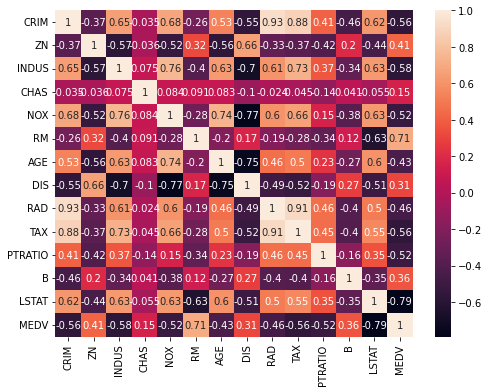

In [ ]:
corr = df_train_set.corr()
plt.figure(figsize = (8, 6))
sns.heatmap(corr, annot = True)

__________________________________________________________________________________________
# **Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
X = df_train_set[['ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = df_train_set['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 121)

R2_score = pd.Series()
intercept = pd.Series()
df_coef = pd.DataFrame(index = ['ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
cross_val = pd.Series()

def model(x) :
    reg = x
    reg.fit(X_train, y_train)
    R2_score[x] =  reg.score(X_test, y_test)
    intercept[x] = reg.intercept_
    df_coef[x] = reg.coef_
    cross_val[x] = np.mean(cross_val_score(reg, X_train, y_train, cv = 10))
    

model(LinearRegression())
model(Ridge())
model(Lasso())    

In [ ]:
R2_score

LinearRegression()    0.780596
Ridge()               0.780096
Lasso()               0.699059
dtype: float64

In [ ]:
cross_val

LinearRegression()    0.759874
Ridge()               0.757764
Lasso()               0.689962
dtype: float64

In [ ]:
intercept

LinearRegression()    34.175355
Ridge()               29.111589
Lasso()               40.166359
dtype: float64

In [ ]:
df_coef

,LinearRegression(),Ridge(),Lasso()
ZN,0.033252,0.036138,0.050214
INDUS,-0.000602,-0.033098,-0.006529
NOX,-14.874181,-7.129965,-0.000000
RM,2.863207,2.860363,0.000000
AGE,-0.006157,-0.012687,0.020818
DIS,-0.981686,-0.882854,-0.278016
RAD,0.162371,0.147407,0.151506
TAX,-0.009839,-0.010289,-0.012796
PTRATIO,-0.741968,-0.660262,-0.507129
B,0.010635,0.011287,0.008374


__________________________________________________________________________________________________
# **Modelling All Features of Train_set**

In [ ]:
df_train_set.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
X = df_train_set[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = df_train_set['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 121)

R2_score = pd.Series()
intercept = pd.Series()
df_coef = pd.DataFrame(index = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
cross_val = pd.Series()


def model(x) :
    reg = x
    reg.fit(X_train, y_train)
    R2_score[x] =  reg.score(X_test, y_test)
    intercept[x] = reg.intercept_
    df_coef[x] = reg.coef_
    cross_val[x] = np.mean(cross_val_score(reg, X_train, y_train, cv = 10))
    
model(LinearRegression())
model(Ridge())
model(Lasso())

In [ ]:
R2_score

LinearRegression()    0.788415
Ridge()               0.788644
Lasso()               0.699058
dtype: float64

In [ ]:
cross_val

LinearRegression()    0.760425
Ridge()               0.759094
Lasso()               0.689961
dtype: float64

In [ ]:
intercept

LinearRegression()    33.165840
Ridge()               28.414764
Lasso()               40.166300
dtype: float64

In [ ]:
df_coef

,LinearRegression(),Ridge(),Lasso()
CRIM,-0.247824,-0.317539,-0.000000
ZN,0.034160,0.037427,0.050213
INDUS,-0.031819,-0.062471,-0.006540
CHAS,1.911439,1.845377,0.000000
NOX,-14.028555,-6.620196,-0.000000
RM,2.804615,2.797187,0.000000
AGE,-0.008250,-0.014257,0.020817
DIS,-0.988302,-0.900782,-0.278032
RAD,0.220044,0.226317,0.151487
TAX,-0.008428,-0.008846,-0.012795


_______________________________________________________________________________________________
# **LINEAR Regression** - Train_set

In [ ]:
from itertools import combinations

In [ ]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

combo_list = []
combo_r2_reg = []
combo_cv_reg = []

for i in range(1, len(features)+1) :
    combo = list(combinations(features, i))
    for j in combo :
        combo_list.append(j)

for i in combo_list :
    X = df_train_set.loc[:,i]
    Y = df_train_set['MEDV']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 121)
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    combo_r2_reg.append(reg.score(X_test, y_test))
    combo_cv_reg.append(np.mean(cross_val_score(reg, X_train, y_train, cv = 10)))
r2_reg = combo_r2_reg.index(max(combo_r2_reg))
cv_reg = combo_cv_reg.index(max(combo_cv_reg))

In [ ]:
#NOTE:-
# Execution may take some time - based on system RAM 

_______________________________________________________________________________________________
# **Ridge** - Train_set

In [ ]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

combo_list = []
combo_r2_rd = []
combo_cv_rd = []

for i in range(1, len(features)+1) :
    combo = list(combinations(features, i))
    for j in combo :
        combo_list.append(j)

for i in combo_list :
    X = df_train_set.loc[:,i]
    Y = df_train_set['MEDV']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 121)
    rd = Ridge()
    rd.fit(X_train, y_train)
    combo_r2_rd.append(rd.score(X_test, y_test))
    combo_cv_rd.append(np.mean(cross_val_score(rd, X_train, y_train, cv = 10)))
r2_rd = combo_r2_rd.index(max(combo_r2_rd))
cv_rd = combo_cv_rd.index(max(combo_cv_rd))

In [ ]:
#NOTE:-
# Execution may take some time - based on system RAM 

_________________________________________________________________________________________________
# **Lasso** - Train_set

In [ ]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

combo_list = []
combo_r2_ls = []
combo_cv_ls = []

for i in range(1, len(features)+1) :
    combo = list(combinations(features, i))
    for j in combo :
        combo_list.append(j)

for i in combo_list :
    X = df_train_set.loc[:,i]
    Y = df_train_set['MEDV']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 121)
    ls = Lasso()
    ls.fit(X_train, y_train)
    combo_r2_ls.append(ls.score(X_test, y_test))
    combo_cv_ls.append(np.mean(cross_val_score(ls, X_train, y_train, cv = 10)))
r2_ls = combo_r2_ls.index(max(combo_r2_ls))
cv_ls = combo_cv_ls.index(max(combo_cv_ls))

In [ ]:
#NOTE:-
# Execution may take some time - based on system RAM 

_______________________________________________________________________________________________
# **Scores**

In [ ]:
print('Linear Regression')
print('R2 Score - ', combo_list[r2_reg],' : ',combo_r2_reg[r2_reg])
print('CV Score - ', combo_list[cv_reg],' : ',combo_cv_reg[cv_reg])

print('\n')

print('Ridge')
print('R2 Score - ', combo_list[r2_rd],' : ',combo_r2_rd[r2_rd])
print('CV Score - ', combo_list[cv_rd],' : ',combo_cv_rd[cv_rd])

print('\n')

print('Lasso')
print('R2 Score - ', combo_list[r2_ls],' : ',combo_r2_ls[r2_ls])
print('CV Score - ', combo_list[cv_ls],' : ',combo_cv_ls[cv_ls])

Linear Regression
R2 Score -  ('CRIM', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO')  :  0.8014551922683548
CV Score -  ('ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')  :  0.7641357941940493


Ridge
R2 Score -  ('CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO')  :  0.8055404905250592
CV Score -  ('ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')  :  0.7614766890656559


Lasso
R2 Score -  ('INDUS', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')  :  0.705761537545476
CV Score -  ('ZN', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')  :  0.6985272514117205
